Load essential libraries

In [3]:
## Load essential libraries
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn-whitegrid')
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

C:\Users\vp140\AppData\Local\Temp\ipykernel_11300\523969277.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Mount the Google Drive folder, if needed, for accessing data

In [4]:
## Mount the Google Drive folder, if needed, for accessing data
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    # Change path below starting from /content/drive/MyDrive/Colab Notebooks/
    # depending on how data is organized inside your Colab Notebooks folder in
    # Google Drive
    DIR = '/content/drive/MyDrive/Colab Notebooks/MAHE/MSIS Coursework/OddSem2023MAHE'
    DATA_DIR = DIR+'/Data/'
else:
    DATA_DIR = 'Data/'

Load the ICU dataset

In [5]:
## Load the ICU dataset
FILENAME = DATA_DIR + 'ICU_Complete.csv'
df = pd.read_csv(FILENAME)
print('ICU dataset')
print('-----------')
print(df.info(verbose = True))

ICU dataset
-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Length_of_stay     2362 non-null   int64  
 1   In-hospital_death  2362 non-null   object 
 2   Age                2362 non-null   int64  
 3   Gender             2362 non-null   object 
 4   Height             2362 non-null   float64
 5   DiasABP_first      2362 non-null   int64  
 6   Glucose_first      2362 non-null   int64  
 7   HR_first           2362 non-null   float64
 8   Temp_first         2362 non-null   float64
 9   PaCO2_first        2362 non-null   int64  
 10  PaO2_first         2362 non-null   int64  
 11  Platelets_first    2362 non-null   int64  
 12  WBC_first          2362 non-null   float64
 13  Weight             2362 non-null   float64
 14  MechVent           2362 non-null   object 
dtypes: float64(5), int64(7), object(3)
memory usage:

Create lists of categorical and continuous features

In [6]:
## Create lists of categorical and continuous features
categorical_features = ['In-hospital_death', 'Gender', 'MechVent']
continuous_features = df.columns[~df.columns.isin(categorical_features)].to_list()
target_variable = 'In-hospital_death'
categorical_features.remove(target_variable)
print(categorical_features)
print(continuous_features)

['Gender', 'MechVent']
['Length_of_stay', 'Age', 'Height', 'DiasABP_first', 'Glucose_first', 'HR_first', 'Temp_first', 'PaCO2_first', 'PaO2_first', 'Platelets_first', 'WBC_first', 'Weight']


Assign 'category' datatype to categorical columns

In [7]:
## Assign 'category' datatype to categorical columns and the target variable column
df[categorical_features] = df[categorical_features].astype('category')
#target_variable = 'In-hospital_death'
df[target_variable] = df[target_variable].astype('category')
df.dtypes

Length_of_stay          int64
In-hospital_death    category
Age                     int64
Gender               category
Height                float64
DiasABP_first           int64
Glucose_first           int64
HR_first              float64
Temp_first            float64
PaCO2_first             int64
PaO2_first              int64
Platelets_first         int64
WBC_first             float64
Weight                float64
MechVent             category
dtype: object

One-hot encode the categorical features

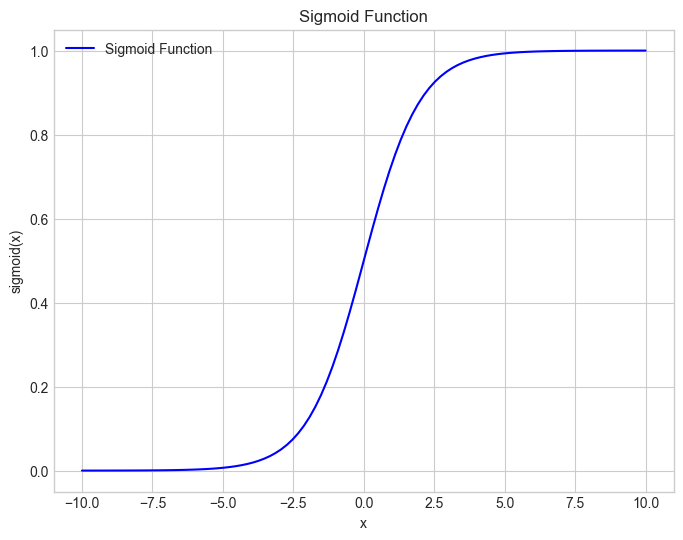

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid (logistic) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Create a range of x values
x = np.linspace(-10, 10, 100)  # Generate 100 equally spaced values from -6 to 6

# Compute the corresponding y values using the sigmoid function
y = sigmoid(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Sigmoid Function', color='b')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.legend()
plt.show()


In [9]:
pd.get_dummies(df[categorical_features])

,Gender_Female,Gender_Male,MechVent_No,MechVent_Yes
0,False,True,False,True
1,True,False,False,True
2,False,True,False,True
3,True,False,False,True
4,False,True,False,True
...,...,...,...,...
2357,False,True,False,True
2358,True,False,True,False
2359,False,True,False,True
2360,False,True,False,True


In [10]:
## One-hot encode the categorical features
df = pd.concat([df, pd.get_dummies(df[categorical_features])], axis = 1).drop(categorical_features, axis = 1)

In [11]:
df.head(5)

,Length_of_stay,In-hospital_death,Age,Height,DiasABP_first,Glucose_first,HR_first,Temp_first,PaCO2_first,PaO2_first,Platelets_first,WBC_first,Weight,Gender_Female,Gender_Male,MechVent_No,MechVent_Yes
0,8,No,76,175.3,67,105,88.0,35.2,34,344,164,7.4,80.6,False,True,False,True
1,6,Yes,78,162.6,50,132,111.0,38.0,30,128,91,16.1,48.4,True,False,False,True
2,8,No,74,175.3,51,106,67.0,34.8,42,486,141,9.0,66.1,False,True,False,True
3,7,No,71,157.5,60,132,84.0,35.5,35,245,120,13.7,55.8,True,False,False,True
4,11,No,78,167.6,57,90,73.0,34.7,40,281,121,12.5,72.4,False,True,False,True


Label encode the target variable

In [12]:
## Label encode the output label
labenc = LabelEncoder()
df[target_variable] = labenc.fit_transform(df[target_variable])

In [13]:
df.head()

,Length_of_stay,In-hospital_death,Age,Height,DiasABP_first,Glucose_first,HR_first,Temp_first,PaCO2_first,PaO2_first,Platelets_first,WBC_first,Weight,Gender_Female,Gender_Male,MechVent_No,MechVent_Yes
0,8,0,76,175.3,67,105,88.0,35.2,34,344,164,7.4,80.6,False,True,False,True
1,6,1,78,162.6,50,132,111.0,38.0,30,128,91,16.1,48.4,True,False,False,True
2,8,0,74,175.3,51,106,67.0,34.8,42,486,141,9.0,66.1,False,True,False,True
3,7,0,71,157.5,60,132,84.0,35.5,35,245,120,13.7,55.8,True,False,False,True
4,11,0,78,167.6,57,90,73.0,34.7,40,281,121,12.5,72.4,False,True,False,True


How balanced is the dataset w.r.t. the target variable?

86.66384419983065
13.336155800169347


<Axes: ylabel='In-hospital_death'>

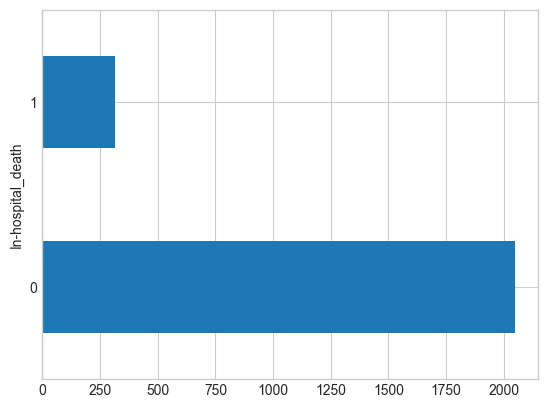

In [14]:
## How balanced is the dataset w.r.t. the
## target variable 'In-hospital_death'?
print(np.mean(df['In-hospital_death'] == 0)*100)
print(np.mean(df['In-hospital_death'] == 1)*100)
df['In-hospital_death'].value_counts().plot(kind = 'barh')

The final dataframe for analysis

In [15]:
## The final dataframe for analysis
df.head(5)

,Length_of_stay,In-hospital_death,Age,Height,DiasABP_first,Glucose_first,HR_first,Temp_first,PaCO2_first,PaO2_first,Platelets_first,WBC_first,Weight,Gender_Female,Gender_Male,MechVent_No,MechVent_Yes
0,8,0,76,175.3,67,105,88.0,35.2,34,344,164,7.4,80.6,False,True,False,True
1,6,1,78,162.6,50,132,111.0,38.0,30,128,91,16.1,48.4,True,False,False,True
2,8,0,74,175.3,51,106,67.0,34.8,42,486,141,9.0,66.1,False,True,False,True
3,7,0,71,157.5,60,132,84.0,35.5,35,245,120,13.7,55.8,True,False,False,True
4,11,0,78,167.6,57,90,73.0,34.7,40,281,121,12.5,72.4,False,True,False,True


Stratified train and test split of the data

In [16]:
## Stratified train and test split of the data
X = df.drop(target_variable, axis = 1)
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,#for balancing that same amount of 0 and 1 is present in test and train parts
                                                    test_size = 0.2,
                                                    random_state = 1)

Check the proportion of output labels in train and test set

In [17]:
## Check the proportion of output labels in train and test set
print('Proportion of 1-to-0 labels in train set = %f, test set = %f\n'%
      (np.mean(y_train == 1), np.mean(y_test == 1)))

Proportion of 1-to-0 labels in train set = 0.133404, test set = 0.133192



Logistic regression starts from here

In [18]:
num_samples =  X_train.shape[0] # number of samples
num_features = X_train.shape[1] # number of features (a.k.a. dimensionality)
num_labels = len(np.unique(y_train)) # number of unique target variable labels

Add bias feature to all samples

In [21]:
## Add bias feature to all samples
X = np.vstack([X, np.ones((?, ?))])
num_features += 1

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 16 and the array at index 1 has size 1

Initial weight vector including bias term

In [ ]:
## Initial weight vector including bias term
w = np.random.choice(np.arange(-1, 1), size = (num_features+1, ), replace = True)
print('w = ')
print(w)

Define sigmoid function

In [ ]:
## Define sigmoid function
sigmoid = lambda x : 1 / (1+np.exp(?))

Calculate raw and sigmoid-activated scores for all samples

In [ ]:
## Calculate raw scores for all samples
z = np.dot(?, ?)

## Calculate sigmoid-activated scores for all samples
a = sigmoid(?)

Calculate average data loss

In [ ]:
## Calculate total average data loss
loss_data = np.mean(y*np.log(?) + (?-?)*np.log(?-?))

Calculate regularization loss

In [ ]:
## Calculate regularization loss
reg = 0.1 # regularization strength
loss_reg = reg * np.sum(? * ?)

Calculate total loss as sum of data loss and regularization loss

In [ ]:
## Calculate total loss as sum of data loss and regularization loss
loss = loss_data + loss_reg
print('Total loss = data loss + regularization loss')
print(loss)

Calculate the gradient w.r.t. weights

In [ ]:
## Calculate the gradient w.r.t. weights
## Sum of gradient of average data loss and the gradient of the regularization loss
dw = (1/?) * np.dot(?, ?-?) + 2 * reg * np.hstack([?, 0])
print('Gradient vector = ')
print(dw)